In [ ]:
# CS 770 - Machine Learning
# Spring 2025
# Assignment 1 - Due 03 March 2025
# Logan Schraeder - x356t577
# EDA and Linear Regression

In [ ]:
# Import libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

1-1. EDA and Regression on the California Housing dataset

In [ ]:
#1.1 EDA and Preprocessing
# Read in data and do preprocessing
df = pd.read_csv('/content/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# Show the shape of the dataset
df.shape

(20640, 10)

In [ ]:
# Show the types of data for each variable
df.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [ ]:
# Calculate and show descriptive statistics for each variable
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# Deal with seemingly mis-entered and unreasonable total rooms and total_bedrooms data
count = 0
for index, row in df.iterrows():
    if 100 < row['total_rooms'] < 1000:
        df.loc[index, 'total_rooms'] = row['total_rooms'] / 100
        count += 1
    elif row['total_rooms'] > 1000:
        df.loc[index, 'total_rooms'] = row['total_rooms'] / 1000
        count += 1

print("Number of changes made to total_rooms: ", count)

count = 0
for index, row in df.iterrows():
    if 100 < row['total_bedrooms'] < 1000:
        df.loc[index, 'total_bedrooms'] = row['total_bedrooms'] / 100
        count += 1
    elif row['total_bedrooms'] > 1000:
        df.loc[index, 'total_bedrooms'] = row['total_bedrooms'] / 1000
        count += 1

print("Number of changes made to total_bedrooms: ", count)
df.head()

Number of changes made to total_rooms:  20505
Number of changes made to total_bedrooms:  19795


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,8.800,1.290,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7.099,1.106,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1.467,1.900,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1.274,2.350,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1.627,2.800,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# Check updated variable descriptive statistics
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,3.976036,5.897294,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,20.264746,15.731552,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,1.001000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1.729000,2.660000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2.474000,3.990000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3.859250,5.790000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,1000.000000,1000.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# Check for missing or NaNs
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
# Drop lines with missing or NaNs
df = df.dropna()

In [ ]:
# Convert features that are unneccesarily float to integer
df['housing_median_age'] = df['housing_median_age'].astype(int)
df['total_rooms'] = df['total_rooms'].astype(int)
df['total_bedrooms'] = df['total_bedrooms'].astype(int)
df['population'] = df['population'].astype(int)
df['households'] = df['households'].astype(int)
df['median_income'] = df['median_income'].astype(int)
df['median_house_value'] = df['median_house_value'].astype(int)

<ipython-input-89-401e782e25a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['housing_median_age'] = df['housing_median_age'].astype(int)
<ipython-input-89-401e782e25a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_rooms'] = df['total_rooms'].astype(int)
<ipython-input-89-401e782e25a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
# Check new dtypes
df.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,int64
total_rooms,int64
total_bedrooms,int64
population,int64
households,int64
median_income,int64
median_house_value,int64
ocean_proximity,object


In [ ]:
# Dummy code the object variable, "ocean_proximity" as int
df = pd.get_dummies(df, columns=['ocean_proximity'], dtype=int)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,8,1,322,126,8,452600,0,0,0,1,0
1,-122.22,37.86,21,7,1,2401,1138,8,358500,0,0,0,1,0
2,-122.24,37.85,52,1,1,496,177,7,352100,0,0,0,1,0
3,-122.25,37.85,52,1,2,558,219,5,341300,0,0,0,1,0
4,-122.25,37.85,52,1,2,565,259,3,342200,0,0,0,1,0


In [ ]:
# Final check for NaNs
df.isnull().any()

,0
longitude,False
latitude,False
housing_median_age,False
total_rooms,False
total_bedrooms,False
population,False
households,False
median_income,False
median_house_value,False
ocean_proximity_<1H OCEAN,False


In [ ]:
# Start EDA and re-check statistics
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,3.505359,5.432878,1424.946949,499.433465,3.393383,206864.413155,0.442128,0.317917,0.000245,0.111095,0.128615
std,2.003578,2.136348,12.591805,20.381504,15.779132,1133.208490,382.299226,1.931455,115435.667099,0.496652,0.465678,0.015641,0.314257,0.334782
min,-124.350000,32.540000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1.000000,2.000000,787.000000,280.000000,2.000000,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2.000000,3.000000,1166.000000,409.000000,3.000000,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,3.000000,5.000000,1722.000000,604.000000,4.000000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,1000.000000,1000.000000,35682.000000,6082.000000,15.000000,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Variable correlations to check for correlations and multicollinearity
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.002947,-0.011278,0.100270,0.056513,-0.013666,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,0.003905,0.020434,-0.108997,-0.071774,-0.079835,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.020844,-0.002152,-0.295787,-0.302768,-0.116570,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.002947,0.003905,-0.020844,1.000000,0.006867,0.035523,0.036039,-0.002792,-0.006411,-0.010533,0.023675,0.000533,-0.008453,-0.009397
total_bedrooms,-0.011278,0.020434,-0.002152,0.006867,1.000000,-0.070077,-0.078443,-0.011734,-0.011949,-0.022824,0.033797,-0.001619,-0.007774,-0.005778
population,0.100270,-0.108997,-0.295787,0.035523,-0.070077,1.000000,0.907186,0.005061,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.036039,-0.078443,0.907186,1.000000,0.013005,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.013666,-0.079835,-0.116570,-0.002792,-0.011734,0.005061,0.013005,1.000000,0.678604,0.167461,-0.234497,-0.009667,0.054591,0.026960
median_house_value,-0.045398,-0.144638,0.106432,-0.006411,-0.011949,-0.025300,0.064894,0.678604,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
ocean_proximity_<1H OCEAN,0.320831,-0.446928,0.045553,-0.010533,-0.022824,0.073450,0.041883,0.167461,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


<Axes: >

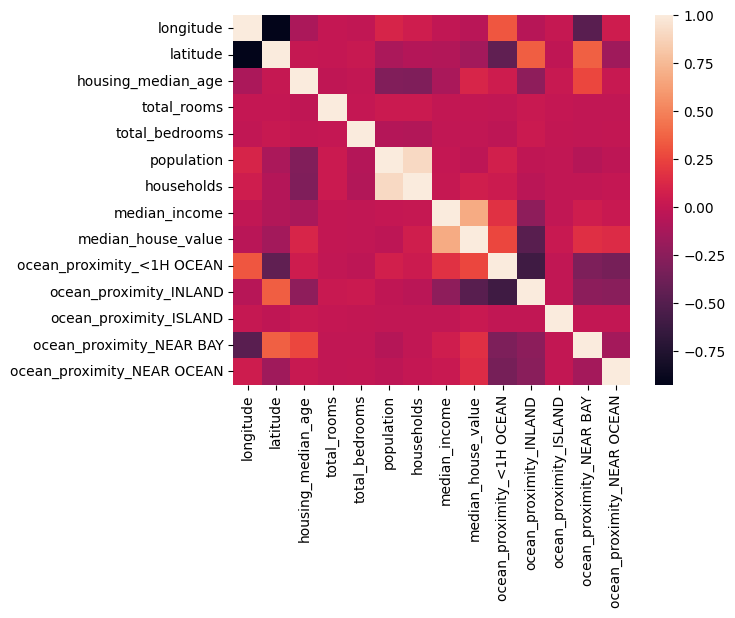

In [ ]:
# Heatmap to visualize correlations
sns.heatmap(df.corr(), annot=False)

In [ ]:
# Check for multicollinearity using VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

stats_df = df
sm.add_constant(stats_df)
# Calculate VIF for each feature
for col in stats_df.columns:
    print(f"VIF for {col}: {variance_inflation_factor(stats_df.values, stats_df.columns.get_loc(col))}")

VIF for longitude: 18.09892730173894
VIF for latitude: 20.033156473600755
VIF for housing_median_age: 1.3402618498549168
VIF for total_rooms: 1.002102000162916
VIF for total_bedrooms: 1.0081809203383036
VIF for population: 6.28903526728098
VIF for households: 6.411265459166551
VIF for median_income: 2.1184294097790253
VIF for median_house_value: 2.7211911638571906
VIF for ocean_proximity_<1H OCEAN: 14816.032343025294
VIF for ocean_proximity_INLAND: 10417.47282124872
VIF for ocean_proximity_ISLAND: 9.280924036506555
VIF for ocean_proximity_NEAR BAY: 3758.9188673590775
VIF for ocean_proximity_NEAR OCEAN: 4342.284214617602


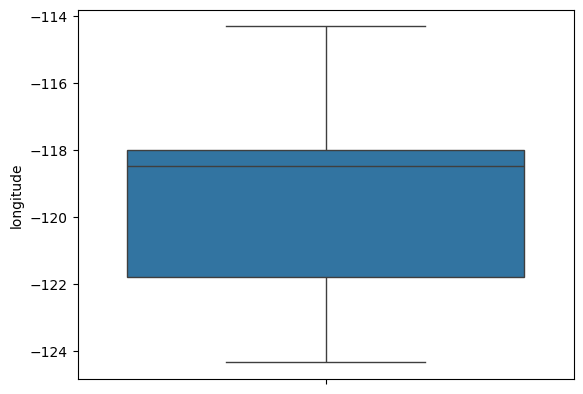

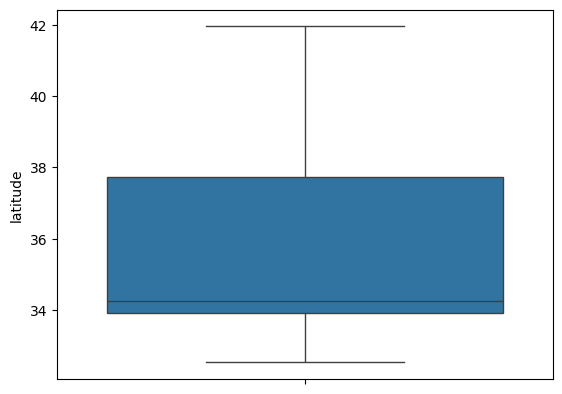

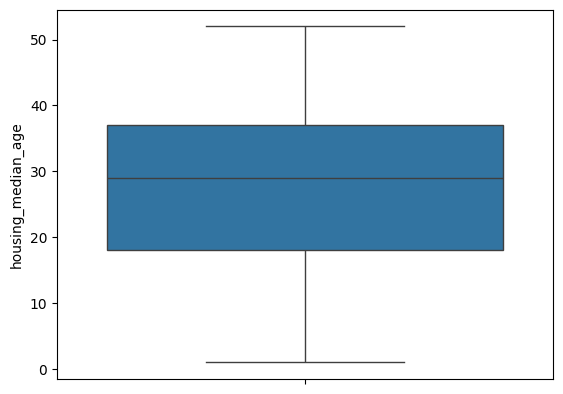

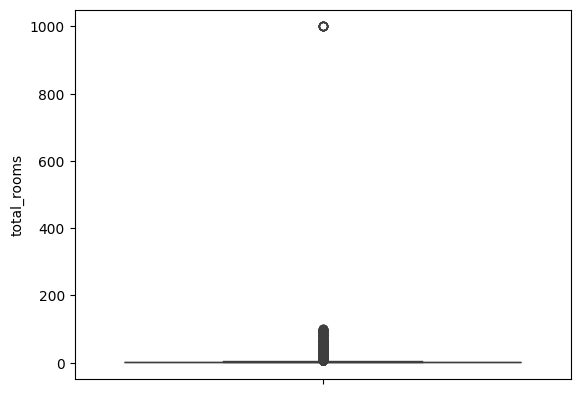

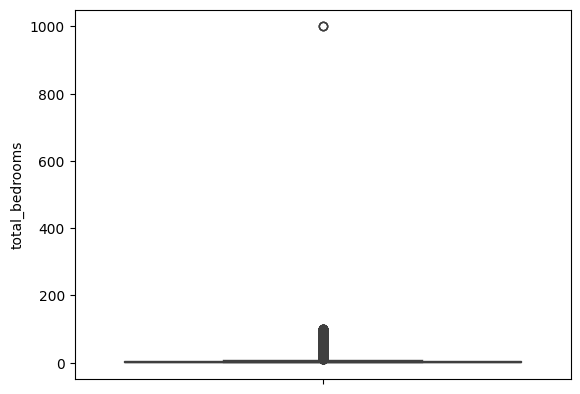

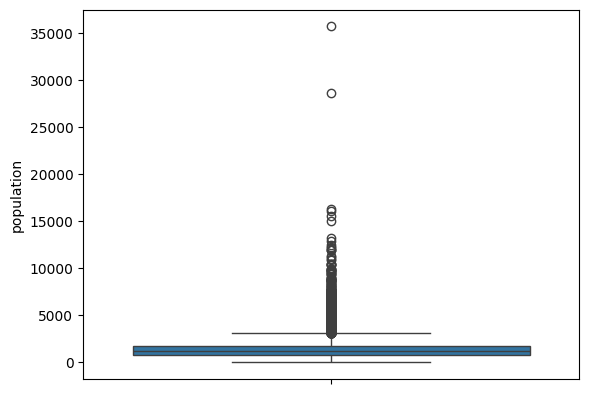

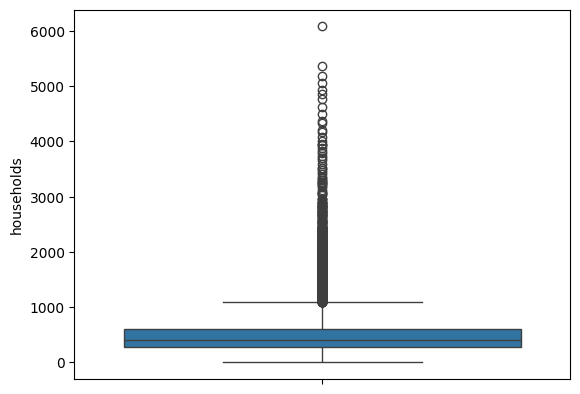

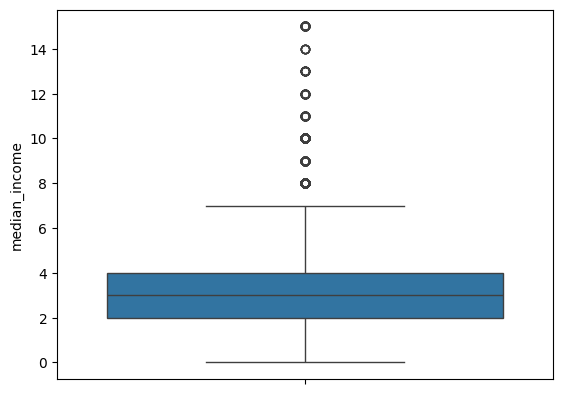

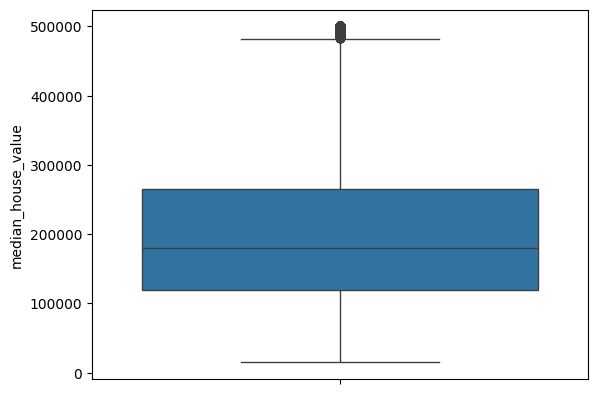

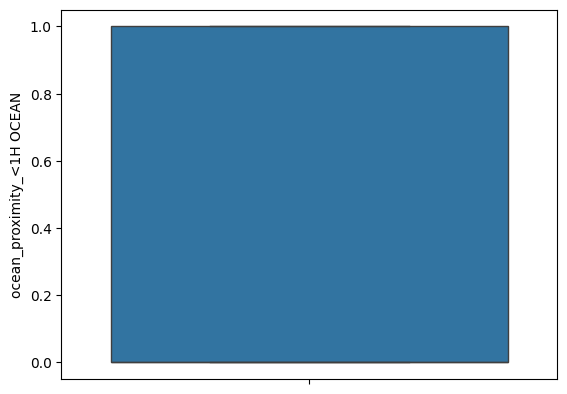

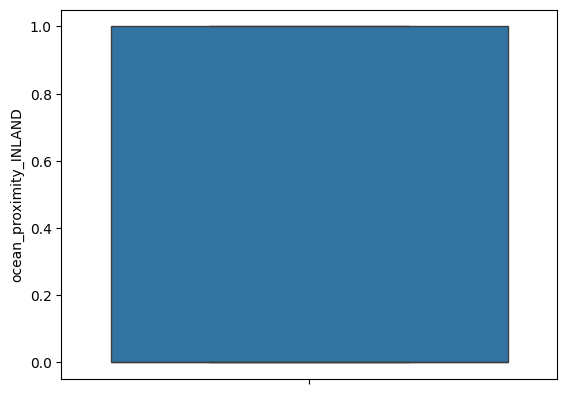

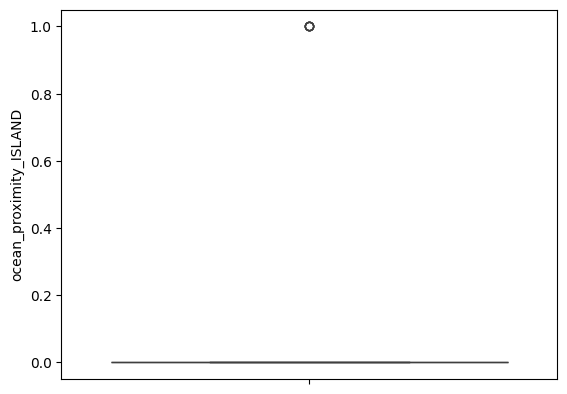

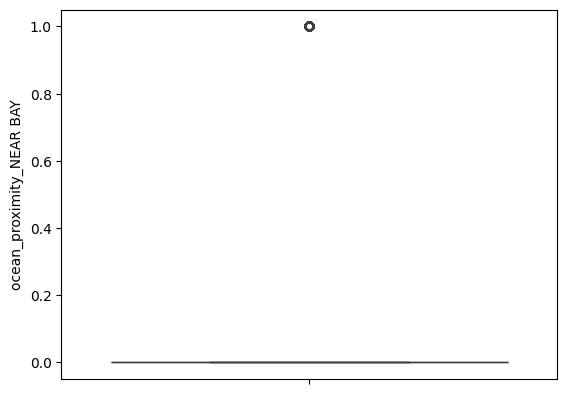

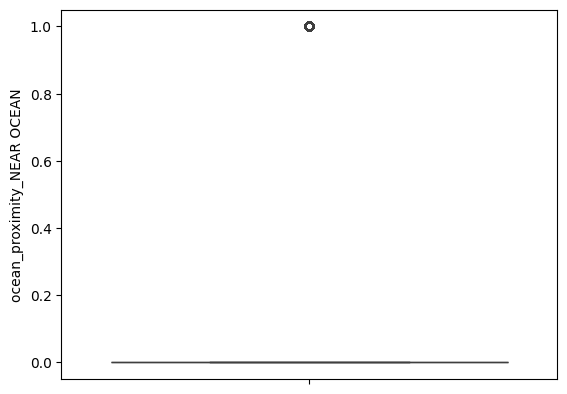

In [ ]:
# Check for outliers
for col in df.columns:
    sns.boxplot(df[col])
    plt.show()

In [ ]:
# Drop notable outliers in the rooms variables
df = df.drop(df[df['total_rooms'] > 100].index)
df = df.drop(df[df['total_bedrooms'] > 100].index)
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20422.000000,20422.000000,20422.000000,20422.000000,20422.000000,20422.000000,20422.000000,20422.000000,20422.000000,20422.000000,20422.000000,20422.000000,20422.000000,20422.000000
mean,-119.570590,35.632874,28.633924,3.114827,5.288219,1425.073695,499.480805,3.393889,206889.357262,0.442121,0.317795,0.000245,0.111155,0.128685
std,2.003694,2.136256,12.590594,5.144395,10.186906,1133.299065,382.320534,1.931691,115447.155459,0.496651,0.465631,0.015646,0.314331,0.334859
min,-124.350000,32.540000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1.000000,2.000000,788.000000,280.000000,2.000000,119525.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2.000000,3.000000,1166.000000,409.000000,3.000000,179800.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,3.000000,5.000000,1722.000000,604.000000,4.000000,264775.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,100.000000,100.000000,35682.000000,6082.000000,15.000000,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


VIF for longitude: 18.108477795738004
VIF for latitude: 20.040539175259568
VIF for housing_median_age: 1.3413342313717378
VIF for total_rooms: 1.057935360456918
VIF for total_bedrooms: 1.032518810015213
VIF for population: 6.290940184780645
VIF for households: 6.455517535163142
VIF for median_income: 2.120734169045398
VIF for median_house_value: 2.7224380467612157
VIF for ocean_proximity_<1H OCEAN: 14820.652002021645
VIF for ocean_proximity_INLAND: 10416.801703173223
VIF for ocean_proximity_ISLAND: 9.288541935472024
VIF for ocean_proximity_NEAR BAY: 3762.169297131341
VIF for ocean_proximity_NEAR OCEAN: 4346.0328627697645


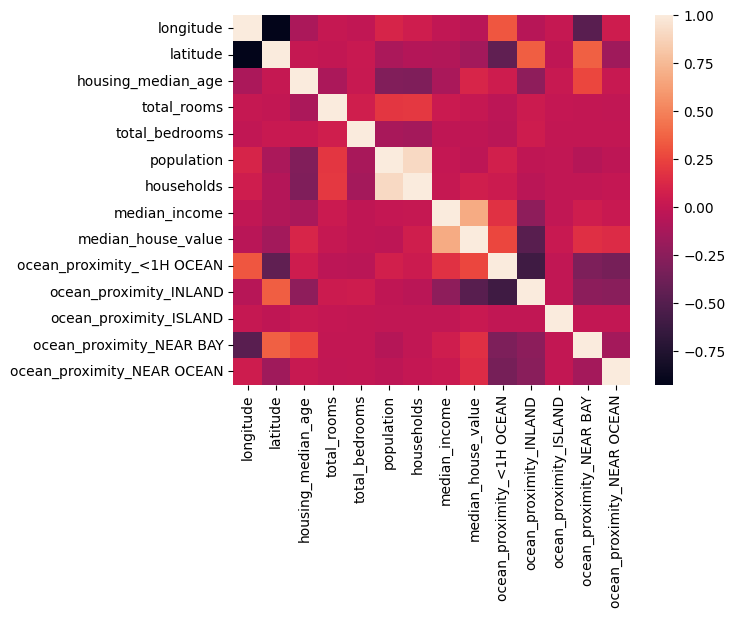

In [ ]:
# Rerun and display correlations and multicollinearity
sns.heatmap(df.corr(), annot=False)
stats_df = df
sm.add_constant(stats_df)
# Calculate VIF for each feature
for col in stats_df.columns:
    print(f"VIF for {col}: {variance_inflation_factor(stats_df.values, stats_df.columns.get_loc(col))}")

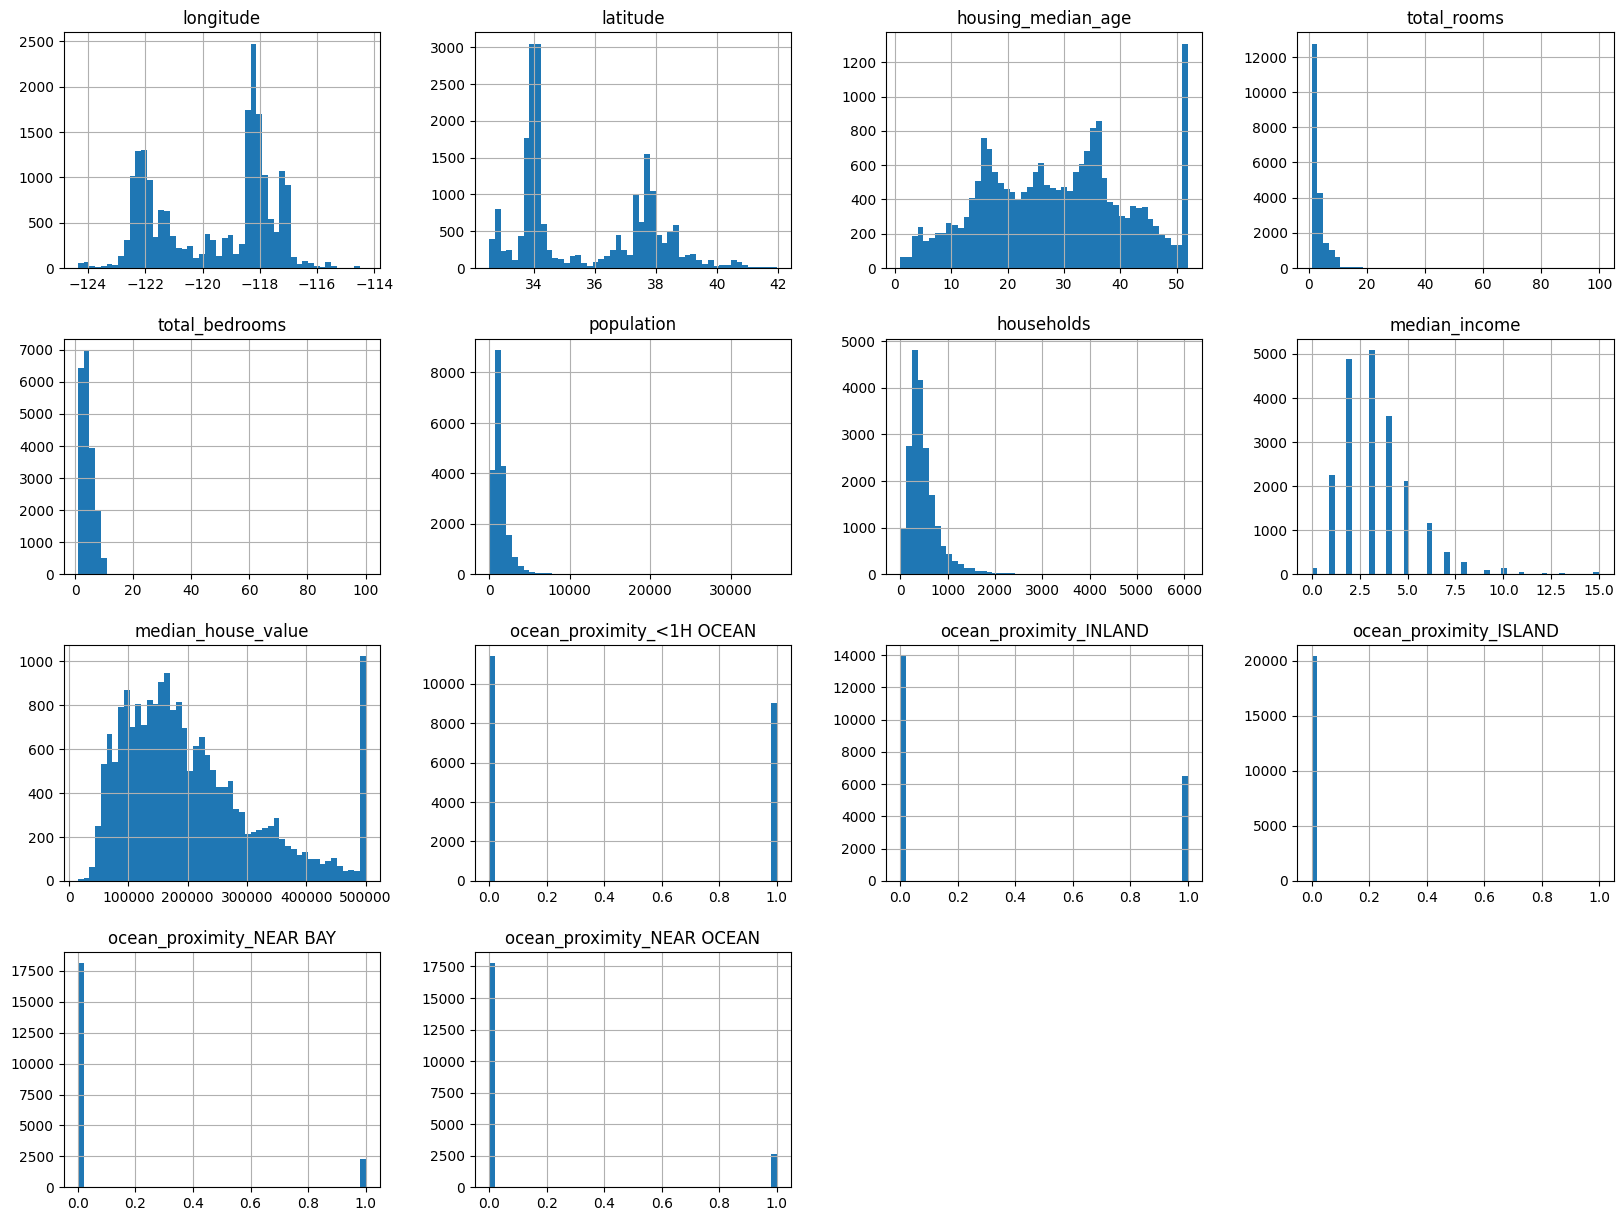

In [ ]:
# Display histograms/bar charts
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# Display pair plots for all variable combinations
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Standardize the data due to scaling issues across variables before moving to linear regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,2.042200e+04,2.042200e+04,2.042200e+04,2.042200e+04,2.042200e+04,2.042200e+04,2.042200e+04,2.042200e+04,2.042200e+04,2.042200e+04,2.042200e+04,2.042200e+04,2.042200e+04,2.042200e+04
mean,-1.447389e-15,1.224714e-15,-8.907009e-17,2.670363e-17,-1.391720e-17,3.618472e-17,1.391720e-17,-1.113376e-17,5.566881e-18,1.196879e-16,2.226752e-17,-8.698251e-18,1.419555e-16,7.793633e-17
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-2.385358e+00,-1.447837e+00,-2.194861e+00,-4.111035e-01,-4.209643e-01,-1.254840e+00,-1.303861e+00,-1.756995e+00,-1.662190e+00,-8.902270e-01,-6.825204e-01,-1.564909e-02,-3.536313e-01,-3.843049e-01
25%,-1.112677e+00,-7.971498e-01,-8.446134e-01,-4.111035e-01,-3.227966e-01,-5.621546e-01,-5.740894e-01,-7.216076e-01,-7.567661e-01,-8.902270e-01,-6.825204e-01,-1.564909e-02,-3.536313e-01,-3.843049e-01
50%,5.393121e-01,-6.426701e-01,2.907605e-02,-2.167124e-01,-2.246290e-01,-2.286069e-01,-2.366680e-01,-2.039138e-01,-2.346530e-01,-8.902270e-01,-6.825204e-01,-1.564909e-02,-3.536313e-01,-3.843049e-01
75%,7.788755e-01,9.770256e-01,6.644866e-01,-2.232137e-02,-2.829374e-02,2.620081e-01,2.733878e-01,3.137799e-01,5.014161e-01,1.123309e+00,1.465158e+00,-1.564909e-02,-3.536313e-01,-3.843049e-01
max,2.625510e+00,2.957174e+00,1.855881e+00,1.883361e+01,9.297632e+00,3.022835e+01,1.460203e+01,6.008411e+00,2.538987e+00,1.123309e+00,1.465158e+00,6.390149e+01,2.827804e+00,2.602101e+00


# 1-2. Linear Regression

In [ ]:
# Perform train/test/validation split
from sklearn.model_selection import train_test_split
y = df['median_house_value']
X = df.drop('median_house_value', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Simple linear regression (one indpendent and one dependent variable)
import statsmodels.api as sm
simple = sm.OLS(df['population'], df['median_house_value']).fit()
residuals = simple.resid
squared_errors = residuals**2
mse = np.mean(squared_errors)
print(simple.summary())
print("MSE:", mse)

                                 OLS Regression Results                                
Dep. Variable:             population   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              13.15
Date:                Sat, 01 Mar 2025   Prob (F-statistic):                    0.000288
Time:                        20:11:22   Log-Likelihood:                         -28971.
No. Observations:               20422   AIC:                                  5.794e+04
Df Residuals:                   20421   BIC:                                  5.795e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [ ]:
# Simple linear regression (Ordinary Least Squares) full model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

# Model evaluation
print('R^2: ', reg.score(X_test, y_test))
# Calculate MSE
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))

R^2:  0.6388706246853142
MSE:  0.36864136552605814


In [ ]:
# Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Model evaluation
print('R^2: ', ridge.score(X_test, y_test))
y_pred = ridge.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))

R^2:  0.6388679220842155
MSE:  0.36864412434499555


In [ ]:
# Lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

# Model evaluation
print('R^2: ', lasso.score(X_test, y_test))
y_pred = lasso.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))

R^2:  -0.00012028241849781907
MSE:  1.020924166802525


In [ ]:
# Try Lasso again with smaller alpha
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

# Model evaluation
print('R^2: ', lasso.score(X_test, y_test))
y_pred = lasso.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))

R^2:  0.2079414725811457
MSE:  0.8085344396860845


In [ ]:
# Try Lasso again with smaller alpha
lasso = Lasso(alpha=0.3)
lasso.fit(X_train, y_train)

# Model evaluation
print('R^2: ', lasso.score(X_test, y_test))
y_pred = lasso.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))

R^2:  0.42566099132841895
MSE:  0.5862860539857171


2-1. Fish LInear Regression

In [ ]:
# Estimate the weight of a fish given its length, height, and width
df = pd.read_csv('/content/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
# Show variable datatypes
df.dtypes

,0
Species,object
Weight,float64
Length1,float64
Length2,float64
Length3,float64
Height,float64
Width,float64


In [ ]:
# Check for null values
df.isnull().any()

,0
Species,False
Weight,False
Length1,False
Length2,False
Length3,False
Height,False
Width,False


In [ ]:
# Standardize the data due to scaling issues across variables before moving to linear regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = df.drop('Species', axis=1)
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Re-check updated dataset
df.head()
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02,1.590000e+02
mean,1.955110e-17,-1.061345e-16,-1.452367e-16,-7.820439e-17,4.468822e-17,-2.793014e-16
std,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00,1.003160e+00
min,-1.116227e+00,-1.881310e+00,-1.873679e+00,-1.937763e+00,-1.695083e+00,-2.005294e+00
25%,-7.799517e-01,-7.222480e-01,-6.941887e-01,-6.978805e-01,-7.082613e-01,-6.140072e-01
50%,-3.512011e-01,-1.050852e-01,-1.044433e-01,-1.578620e-01,-2.773402e-01,-1.005570e-01
75%,7.052627e-01,6.475523e-01,6.631618e-01,7.277683e-01,7.945562e-01,6.944472e-01
max,3.507554e+00,3.286801e+00,3.274892e+00,3.177292e+00,2.337161e+00,2.216321e+00


In [ ]:
# Create fish test/train/val split
y = df['Weight']
X = df.drop('Weight', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Simple linear regression (Ordinary Least Squares) full model
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

print('R^2: ', reg.score(X_test, y_test))
y_pred = reg.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))

R^2:  0.8821430593048696
MSE:  0.13164407714659326


In [ ]:
# Find and report coefficients
coefficients = reg.coef_
intercept = reg.intercept_

if hasattr(X_train, 'columns'): # If X is a Pandas DataFrame
    feature_names = X.columns
    for feature, coef in zip(feature_names, coefficients):
        print(f"Coefficient for {feature}: {coef}")
else:
      for i, coef in enumerate(coefficients):
        print(f"Coefficient for feature {i+1}: {coef}")

print(f"Intercept: {intercept}")

Coefficient for Length1: 1.2157097121436014
Coefficient for Length2: 0.23415087151256309
Coefficient for Length3: -0.8191460056350055
Coefficient for Height: 0.27812841256446696
Coefficient for Width: 0.1274624647214369
Intercept: -0.026432408798385675


2-2. Lasso and Ridge Regression

In [ ]:
# Ridge and its R^2
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print('R^2: ', ridge.score(X_test, y_test))
y_pred = ridge.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))

R^2:  0.8765195085833242
MSE:  0.13792548187896211


In [ ]:
# Lasso and its R^2
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
print('R^2: ', lasso.score(X_test, y_test))
y_pred = lasso.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))

R^2:  -0.023082268458468613
MSE:  1.1427644420590584


In [ ]:
# Lasso again with smaller alpha
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)
print('R^2: ', lasso.score(X_test, y_test))
y_pred = lasso.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))

R^2:  0.5491097520556738
MSE:  0.5036362749188681


In [ ]:
# Lasso again with smaller alpha
lasso = Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
print('R^2: ', lasso.score(X_test, y_test))
y_pred = lasso.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))

R^2:  0.7528291717846878
MSE:  0.27608535726490585


In [ ]:
# Lasso again with smaller alpha
lasso = Lasso(alpha=0.15)
lasso.fit(X_train, y_train)
print('R^2: ', lasso.score(X_test, y_test))
y_pred = lasso.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))

R^2:  0.8379797957407875
MSE:  0.18097364604075317
